<h1><center> The Shape Dependent Coffee-Ring Effect of Colloidal Drops on a Circular Boundary


>    We simulate both ellipsoidal and spherical particles as they sediment on a circular boundary. We represent spherical suspended particles undergoing capillary flow radially outwards with a series of random walks. We represent ellipsoidal particles with the same model while also accounting for interparticle attraction between anisotropic particles. The deposition of spherical particles in an evaporating droplet can be represented as a Poisson Process while the deposition of ellipsoidal particles can be modeled using a Kardar-Parisi-Zhang (KPZ) Process. We provide a method for visualization of the Coffee-Ring effect, and ways to visualize the avoidance of it.

We utilize only simple plotting functions and random variable generators.

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
#from __future__ import division

To visualize the existence and the inhibition of the coffee ring effect, we allow users to choose between a Poisson and a KPZ process to represent either spherical or ellipsoidal particles. Users have control over the process, the number of particles in the evaporating liquid, the number of steps in time a particle may take, the number of sedimentation sites, and the strength of capillary flow as represented in the probability of a particle to move outward. 

In [2]:
#N_walks = number of particles
#N_steps = number of steps in time a particle may take 
#r_prob = strength of capillary flow
#n = amount of detail on radial surface profile

def Boundary_iteration_poisson(N_walks, N_steps ,R_initial, r_prob,n):
    
    #Initialize the spherical boundary
    Boundary=np.empty(360*n)
    
    #Fill initial boundary with R_initial or the edge 
    Boundary.fill(R_initial) 
    
    #Initialize an array to store Recorded Boundaries as each particle sediments
    Recorded_Boundaries = np.zeros((N_walks,360*n))
    #Set first recorded boundary to be all at R_initial
    Recorded_Boundaries[0]= Boundary
      
    #For each particle, use a random walk to sediment the particle on a boundary    
    for i in range(1,N_walks):
        Recorded_Boundaries[i] = randomWalk_poisson(r_prob,N_steps,Recorded_Boundaries[i-1],n)
    
    #Return an array of Recorded_Boundaries
    return Recorded_Boundaries

In [3]:
def Boundary_iteration_KPZ(N_walks, N_steps ,R_initial, r_prob,n): #n is multiple of 360
    
    #Initialize the spherical boundary
    Boundary=np.empty(360*n)
    
    #Fill initial boundary with R_initial or the edge 
    Boundary.fill(R_initial) 
    
    #Initialize an array to store Recorded Boundaries as each particle sediments
    Recorded_Boundaries = np.zeros((N_walks,360*n))
    #Set first recorded boundary to be all at R_initial
    Recorded_Boundaries[0]= Boundary
    
    #For each particle, use a random walk to sediment the particle on a boundary 
    for i in range(1,N_walks):
        Recorded_Boundaries[i] = randomWalk_KPZ(r_prob,N_steps,Recorded_Boundaries[i-1],n)
    
    #Return an array of Recorded_Boundaries
    return Recorded_Boundaries

Each sedimentation is represented by a random walk representing either a KPZ or a Poisson Process.

Both processes have a capillary strength represented by the probability that the particle will move towards the edge of the circle as r_prob and an equal probability of taking a clockwise or counterclockwise step to represent brownian motion. 

In [4]:
def randomWalk_r_step(r_prob,rand,position):  
    new_position=0
    
    #If we begin at the origin, always take a step outward
    if position == 0:
        new_position = position + 1
      
    #Otherwise, randomly walk based on given capillary strength
    else:
        if rand < r_prob:
            new_position = position + 1
    
        else:
            new_position = position - 1
            
    return new_position

def randomWalk_theta_step(rand,position,n):  
    new_position=0
    
    #Random walk based on equal probability of clockwise or counterclockwise step
    if rand >.5:
        new_position = position + 1
    else: 
        new_position = position - 1
        
    #Make sure particle stays within a circular boundary    
    if new_position == 360*n:
        new_position = 0
    if new_position == -1:
        new_position = 359*n
    
    return new_position

The random walk for the poisson process continues until a particle hits a boundary directly under it. At this moment the walk ends and the particle 'sediments' making the boundary smaller at that angular value. 

In [5]:
def randomWalk_poisson(r_prob,N_steps,Current_Boundary,n):
    
    #Initialize an array of N_steps to store random values for the radial random walk
    rand_r=np.empty(N_steps)
    for i in range(0,N_steps-1):
        rand_r[i]=np.random.random()
    
    #Initialize an array of N_steps to store random values for the angular random walk
    rand_theta=np.empty(N_steps)
    for i in range(0,N_steps-1):
        rand_theta[i]=np.random.random()
        
        
    #Initialize and empty array of particle positions
    positions_r = []
    positions_theta = []
    
    
    #Initialize first radial value as 0
    positions_r.append(0)
    
    #Initialize first angular value randomly within the circular boundary
    choose=np.random.random()
    theta_initial= np.int(360*n*choose)
    positions_theta.append(theta_initial)

    #Random walk for N_steps
    for i in range(0,N_steps):
        
        #Find the value of the boundary at our current angular value
        original_theta=positions_theta[i]
        
        #Returns our value of boundary at theta
        boundary_at_theta= Current_Boundary[original_theta] 
        
        #Check that we are not at a boundary
        if boundary_at_theta > positions_r[i]:  
            #If not, continue to random walk
            
            #Randomly choose to make a clockwise or counterclockwise step
            new_position_theta=randomWalk_theta_step(rand_theta[i],positions_theta[i],n)
                
            #If particle is now within a wall, bounce off a wall
            if Current_Boundary[new_position_theta] < positions_r[i]:
                positions_theta.append(original_theta)
                
            #If not, append new angular value
            else:
                positions_theta.append(new_position_theta)
                
                
            #Randomly choose to make a radially outward or inward step
            new_position_r=randomWalk_r_step(r_prob,rand_r[i],positions_r[i])
            positions_r.append(new_position_r)
                
                
    
        
        #If we are at a boundary, end the random walk
        else:
            #Plot the sedimentation path for each particle
            polar_positions_theta=np.empty(len(positions_theta))
            for i in range(0,len(positions_theta)):
                polar_positions_theta[i] = positions_theta[i] * np.pi / 180
            plt.title('Particles Randomly Walking in a Poisson Process')
            plt.polar(polar_positions_theta, positions_r)
            
            #Sediment the particle on the boundary
            Current_Boundary[original_theta] =  Current_Boundary[original_theta]-1
            
            #End random walk before reaching N_steps
            break  
    
    #Returns new edited boundary
    return Current_Boundary

The random walk for the KPZ process continues until a particle hits a boundary directly under it or is next to a boundary. The particles are now 'sticky' so they will stop not only when pushed against other particles but also when bound to particles next to them. At this moment the walk ends and the particle 'sediments' making the boundary smaller at that angular value. 

In [6]:
def randomWalk_KPZ(r_prob,N_steps,Current_Boundary,n): #theta_prob is constant 50%:50%
    
    #Initialize an array of N_steps to store random values for the radial random walk
    rand_r=np.empty(N_steps)
    for i in range(0,N_steps-1):
        rand_r[i]=np.random.random()
    
    #Initialize an array of N_steps to store random values for the angular random walk
    rand_theta=np.empty(N_steps)
    for i in range(0,N_steps-1):
        rand_theta[i]=np.random.random()
        
        
    #Initialize and empty array of particle positions
    positions_r = []
    positions_theta = []
    
    
    #Initialize first radial value as 0
    positions_r.append(0)
    
    #Initialize first angular value randomly within the circular boundary
    choose=np.random.random()
    theta_initial= np.int(360*n*choose)
    positions_theta.append(theta_initial)

    #Random walk for N_steps
    for i in range(0,N_steps):
        
        #Find the boundary at our current position of theta and the boundary left and right of it
        original_theta=positions_theta[i] 
        plus_theta=original_theta+1
        minus_theta=original_theta-1
    
        #Setting Rules for edge cases
        if (plus_theta == 360*n):
            plus_theta = 0
        if (minus_theta == 0):
            minus_theta = 359*n-1
            
        cw_theta = Current_Boundary[plus_theta]
        ccw_theta = Current_Boundary[minus_theta]
        boundary_at_theta = Current_Boundary[original_theta]
    
        #Check that we are not at a boundary and that we are not next to a boundary
        if (boundary_at_theta > positions_r[i] and cw_theta > positions_r[i] and ccw_theta > positions_r[i]):
            #If not, continue to random walk
            
            #Randomly choose to make a clockwise or counterclockwise step
            new_position_theta=randomWalk_theta_step(rand_theta[i],positions_theta[i],n)
            positions_theta.append(new_position_theta)    
            
            #Randomly choose to make a radially outward or inward step
            new_position_r=randomWalk_r_step(r_prob,rand_r[i],positions_r[i])
            positions_r.append(new_position_r)
        

        #If we are at a boundary, or next to a boundary, end the random walk
        else:
            #Plot the sedimentation path for each particle
            polar_positions_theta=np.empty(len(positions_theta))
            for i in range(0,len(positions_theta)):
                polar_positions_theta[i] = positions_theta[i] * np.pi / 180
            plt.title('Particles Randomly Walking in a KPZ Process')
            plt.polar(polar_positions_theta, positions_r)
            
            #Current_Boundary[original_theta] =  Current_Boundary[original_theta] - 1
            
            #Sediment the particle on the boundary
            if (boundary_at_theta == positions_r[i]):
                Current_Boundary[original_theta] =  Current_Boundary[original_theta] - 1
            elif (cw_theta == positions_r[i]):
                Current_Boundary[original_theta] = Current_Boundary[plus_theta]
            else: #if ccw_theta == positions_r[i]
                Current_Boundary[original_theta] = Current_Boundary[minus_theta]
            
            
            #End random walk before reaching N_steps
            break
            
    #Returns new edited boundary        
    return Current_Boundary 

Now that our processes have been defined, we can visualize particle sedimentation graphically.

First we visualize the particles paths as they sediment randomly.

In [7]:
#Initialize our values
N_walks=7000
N_steps=1000
R_initial=100
r_prob=.9
n=1

/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:2445: UserWarning: Trying to create polar plot on an axis that does not have a polar projection.
  warnings.warn('Trying to create polar plot on an axis that does '
/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:984: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  return gcf().gca(**kwargs)
/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


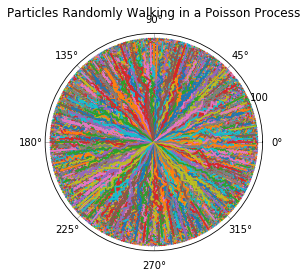

In [8]:
Test_Poisson = Boundary_iteration_poisson(N_walks, N_steps ,R_initial, r_prob,n)

/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:2445: UserWarning: Trying to create polar plot on an axis that does not have a polar projection.
  warnings.warn('Trying to create polar plot on an axis that does '
/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:984: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  return gcf().gca(**kwargs)
/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


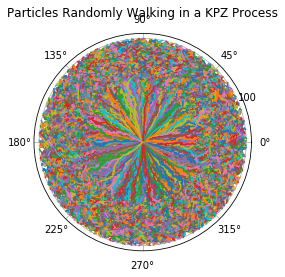

In [9]:
Test_KPZ = Boundary_iteration_KPZ(N_walks, N_steps ,R_initial, r_prob,n)

Next we visualize the boundary after all particles have sedimented

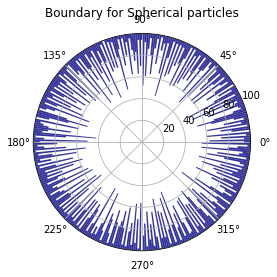

In [10]:
theta = np.linspace(0.0, 2 * np.pi, 360*n, endpoint=False)
width = (2*np.pi) / (360*n)

ax = plt.subplot(111, polar=True)
bars = ax.bar(theta, (Test_Poisson[N_walks-1])-R_initial, width=width, bottom=R_initial)

for r, bar in zip(Test_Poisson[N_walks-1]-R_initial, bars):
    bar.set_facecolor(plt.cm.jet(r / 10.))
    bar.set_alpha(0.8)

plt.title('Boundary for Spherical particles')
plt.show()

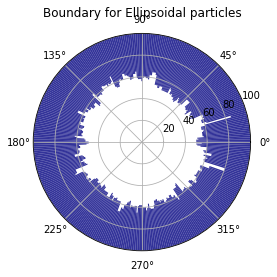

In [11]:
theta = np.linspace(0.0, 2 * np.pi, 360*n, endpoint=False)
width = (2*np.pi) / (360*n)

ax = plt.subplot(111, polar=True)
bars = ax.bar(theta, (Test_KPZ[N_walks-1])-R_initial, width=width, bottom=R_initial)

for r, bar in zip(Test_KPZ[N_walks-1]-R_initial, bars):
    bar.set_facecolor(plt.cm.jet(r / 10.))
    bar.set_alpha(0.8)

plt.title('Boundary for Ellipsoidal particles')
plt.show()

We wish to compare the effective radius of both spherical and ellipsoidal particles sedimenting as a function of particles present in the evaporating liquid.

In [12]:
def N_step_iterate_Poisson(Test,N_walks):
    
    R_effective = np.zeros(N_walks)
    for i in range(1,N_walks+1):
        R_effective[i-1] = np.mean(Test[i-1])
    
    return R_effective

def N_step_iterate_KPZ(Test,N_walks):
    
    R_effective = np.zeros(N_walks)
    for i in range(1,N_walks+1):
        R_effective[i-1] = np.mean(Test[i-1])
    
    return R_effective

In [13]:
R_effective_poisson = N_step_iterate_Poisson(Test_Poisson,N_walks)
R_effective_KPZ = N_step_iterate_KPZ(Test_KPZ,N_walks)

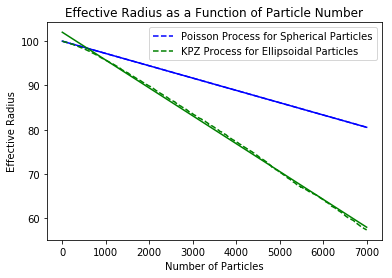

In [14]:
x = np.linspace(0, N_walks, N_walks)
plt.title('Effective Radius as a Function of Particle Number')
plt.xlabel('Number of Particles')
plt.ylabel('Effective Radius')

slope_poisson, intercept_poisson = np.polyfit(x, R_effective_poisson, 1)
abline_values_poisson = [slope_poisson * i + intercept_poisson for i in x]
plt.plot(x, R_effective_poisson, '--b', label='Poisson Process for Spherical Particles')
plt.plot(x, abline_values_poisson, 'b')

slope_KPZ, intercept_KPZ = np.polyfit(x, R_effective_KPZ, 1)
abline_values_KPZ = [slope_KPZ* i + intercept_KPZ for i in x]
plt.plot(x, R_effective_KPZ, '--g', label='KPZ Process for Ellipsoidal Particles')
plt.plot(x, abline_values_KPZ, 'g')

plt.legend()
plt.show()

For each process, a line of best fit is overlain on the actual data obtained from our model of the boundary. The slope of each line represents how quickly the radius of each boundary shrinks. We observe that the rate of change of radius of the KPZ process is greater than rate of change of radius of the Poisson Process as the number of particles that sediment increases. The KPZ process exhibits the behavior of ellipsoidal particles while the Poisson process exhibits the behavior of spherical particles described as the Coffee-Ring effect. We note that the radius of particles for the KPZ process increases faster as particles 'stick' effectively skipping multiple sedimentation sites that the spherical model would need to fill. The growth for the Poisson process is linear, as the boundary can only increase by one particle at a time.

We wish to also compare the standard deviation of the radius of both spherical and ellipsoidal particles sedimenting as a function of particles present in the evaporating liquid.

In [15]:
def N_step_STD_poisson(Test,N_walks):
    
    R_STD = np.zeros(N_walks)
    for i in range(1,N_walks+1):
        R_STD[i-1] = np.std(Test[i-1])
    
    return R_STD

def N_step_STD_KPZ(Test,N_walks):
    
    R_STD = np.zeros(N_walks)
    for i in range(1,N_walks+1):
        R_STD[i-1] = np.std(Test[i-1])
    
    return R_STD

In [16]:
R_STD_poisson = N_step_STD_poisson(Test_Poisson,N_walks)
R_STD_KPZ = N_step_STD_KPZ(Test_KPZ,N_walks)

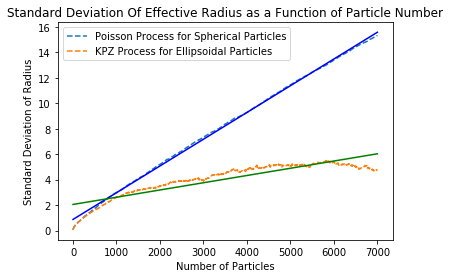

In [17]:
x = np.linspace(0, N_walks, N_walks)
plt.title('Standard Deviation Of Effective Radius as a Function of Particle Number')
plt.xlabel('Number of Particles')
plt.ylabel('Standard Deviation of Radius')

slope_poisson, intercept_poisson = np.polyfit(x, R_STD_poisson, 1)
abline_values_poisson = [slope_poisson * i + intercept_poisson for i in x]
plt.plot(x, R_STD_poisson, '--', label='Poisson Process for Spherical Particles')
plt.plot(x, abline_values_poisson, 'b')

slope_KPZ, intercept_KPZ = np.polyfit(x, R_STD_KPZ, 1)
abline_values_KPZ = [slope_KPZ * j + intercept_KPZ for j in x]
plt.plot(x, R_STD_KPZ, '--', label='KPZ Process for Ellipsoidal Particles')
plt.plot(x, abline_values_KPZ, 'g')

plt.legend()
plt.show()

This graph is a way to quantify and show how rough our boundaries are. The higher the standard deviation, the rougher the surface. We see that the boundary of the Poisson Process becomes rougher as the number of particles increases. The boundary of the KPZ process has a smoother interface. This is consistent with the experimental results as described by Peter Yunker. 

Finally for each process we visualize the particle density at growing radii.

In [18]:
def Density_Poisson(Test,N_walks):
    Final_Boundary = Test[N_walks-1]
    
    Count_at_Radius = np.zeros(R_initial)
    count = 0
    
    for i in range(1,R_initial):
        
        for j in range(0,360*n-1):
            if Final_Boundary[j] <= count:
                Count_at_Radius[i] = Count_at_Radius[i] + 1
        count = count + 1
        
    return Count_at_Radius   

def Density_KPZ(Test,N_walks):

    Final_Boundary = Test[N_walks-1]
    
    Count_at_Radius = np.zeros(R_initial)
    count = 0
    
    for i in range(1,R_initial):
        
        for j in range(0,360*n-1):
            if Final_Boundary[j] <= count:
                Count_at_Radius[i] = Count_at_Radius[i] + 1            
        count = count + 1      
        
    return Count_at_Radius   

In [19]:
Count_at_Radius_poisson = Density_Poisson(Test_Poisson,N_walks)
Count_at_Radius_KPZ = Density_KPZ(Test_KPZ,N_walks)

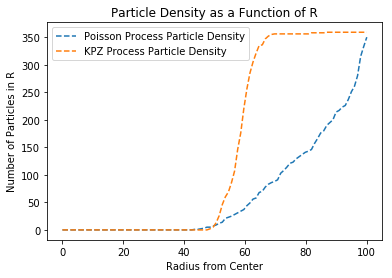

In [20]:
x = np.linspace(0, R_initial, R_initial)
plt.title('Particle Density as a Function of R')
plt.xlabel('Radius from Center')
plt.ylabel('Number of Particles in R')
plt.plot(x, Count_at_Radius_poisson, '--', label='Poisson Process Particle Density')
plt.plot(x, Count_at_Radius_KPZ, '--', label='KPZ Process Particle Density')
plt.legend()
plt.show()

For each process we plot the amount of particles contained as radius increases obtained from data of particles on the boundary. We see what we would expect from experimental data. The particles on the boundary of the Poisson process are primarily concentrated at the edges of the circle while the particles on the boundary of the KPZ process increase as we hit an effective radius. We also are able to understand the nature of dimensionality of the boundary in noting the shape of the curves. While the ellipsoidal particles essentially create a smooth wall, the boundary of the spherical particles is rough.